In [105]:
import pandas as pd 
import numpy as np
import seaborn as sns

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

pd.options.display.max_rows = 55
pd.options.display.max_colwidth = 500

# 1) Exploring the datasets

In [182]:
ab = pd.read_csv('ab.txt', sep=',')

ab.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [183]:
demo = pd.read_csv('demogr.txt', sep=',')

demo.head()

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27
1,40143397,2016-07-02T00:00:00Z,and,F,DEU,56
2,89856430,2017-06-05T00:00:00Z,and,M,TUR,31
3,76188504,2016-09-24T00:00:00Z,iOS,M,BRA,54
4,76493748,2017-06-07T00:00:00Z,iOS,M,BRA,24


In [193]:
data.head()

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
2,2017-11-12,41195147,sku_four_599,599,2017-06-26T00:00:00Z,and,M,BRA,17
3,2017-09-26,91591874,sku_two_299,299,2017-01-05T00:00:00Z,and,M,TUR,17
4,2017-12-01,91591874,sku_four_599,599,2017-01-05T00:00:00Z,and,M,TUR,17


In [184]:
revenue = pd.read_csv('revenue.txt', sep=',')

revenue.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20T00:00:00Z,USA
1,2,male,ios,177217.0,2013-09-21T00:00:00Z,USA
2,3,male,ios,177197.0,2013-09-22T00:00:00Z,USA
3,4,male,ios,157193.0,2013-09-23T00:00:00Z,USA
4,5,male,ios,165592.0,2013-09-24T00:00:00Z,USA


In [3]:
customer = pd.read_csv('customer.txt', sep=',')

customer.head()

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [4]:
app = pd.read_csv('app.txt', sep= ',')

app.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


We will work with the 'app' and 'customer' datasets, which will be called 'data'.

In [174]:
#Merging app and customer datasets

data = app.merge(customer, on=['uid'], how= 'inner')

data.head(2)

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17


In [139]:
len(customer)

len(data)

9006

Data has almost 1000 rows less than customer.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 9 columns):
date        9006 non-null object
uid         9006 non-null int64
sku         9006 non-null object
price       9006 non-null int64
reg_date    9006 non-null object
device      9006 non-null object
gender      9006 non-null object
country     9006 non-null object
age         9006 non-null int64
dtypes: int64(3), object(6)
memory usage: 703.6+ KB


In [31]:
#Search unique values

def unique_counts(columns):
    for i in data.columns:
        count= data[i].nunique()
        print (i, ":", count)
    

In [32]:
unique_counts(data)

date : 998
uid : 1322
sku : 8
price : 6
reg_date : 739
device : 2
gender : 2
country : 6
age : 51


## 2) Summary stastics 

In [6]:
data.price.agg('mean')

406.77259604707973

In [7]:
data.describe()

,uid,price,age
count,9.006000e+03,9006.000000,9006.000000
mean,5.719633e+07,406.772596,23.922274
std,2.652288e+07,187.918230,9.044646
min,1.115855e+07,99.000000,15.000000
25%,3.421581e+07,299.000000,17.000000
50%,5.790297e+07,299.000000,21.000000
75%,8.172713e+07,499.000000,28.000000
max,9.997504e+07,899.000000,75.000000


In [100]:
data_summary = data.groupby(['device', 'gender']).agg({'price': ['mean', 'median', 'std']})

data_summary

price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197

In [101]:
def truncated_mean(data):
    top_val = data.quantile(.9)
    bot_val = data.quantile(.1)
    trunc_data = data[(data <= top_val) & (data >= bot_val)]
    mean = trunc_data.mean()
    return(mean)

In [102]:
demo = data.groupby(by=['device','country'], as_index= False)

demo

In [103]:
demo.price.mean()

demo.agg({'age':[truncated_mean]})

,device,country,age
,,,truncated_mean
0,and,BRA,22.798977
1,and,CAN,23.335000
2,and,DEU,21.640257
3,and,FRA,21.786885
4,and,TUR,22.422572
5,and,USA,22.241203
6,iOS,BRA,22.784946
7,iOS,CAN,24.048780
8,iOS,DEU,19.611413


## KPI: 

- Let's consider the average amount paid per purchase within a user's first 28 days
- Reference to parse dates correctly: http://strftime.org/ 

In [176]:
#Let's set a limit maximum date when the purchase was done  

data.reg_date.max()

'2018-03-17T00:00:00Z'

In [175]:
current_date = pd.to_datetime('2018-03-17T00:00:00Z')

start_date = pd.Timestamp('2018-03-17T00:00:00Z')

max_lapse_date = current_date - timedelta(days=28)

max_lapse_date

Timestamp('2018-02-17 00:00:00')

In [219]:
# Filter the data 
purchase= data[data['reg_date'] < '2018-03-17T00:00:00Z']

In [220]:
#Converting object to datetime64[ns], so we can use the datetime library 

purchase['reg_date'] = pd.to_datetime(purchase['reg_date'], format='%Y-%m-%dT%H:%M:%SZ')


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
#Checking
purchase['reg_date']

0      2017-06-26
1      2017-06-26
2      2017-06-26
3      2017-01-05
4      2017-01-05
5      2016-10-07
6      2016-10-07
7      2016-10-07
8      2016-10-07
9      2016-10-07
10     2016-02-16
11     2016-02-16
12     2016-02-16
13     2016-02-16
14     2016-02-16
15     2016-02-16
16     2016-02-16
17     2017-03-09
18     2017-03-09
19     2016-04-20
20     2016-04-20
21     2016-04-20
22     2016-04-20
23     2016-04-20
24     2016-09-15
25     2016-09-15
26     2016-09-15
          ...    
8979   2017-04-29
8980   2017-07-02
8981   2017-07-02
8982   2017-07-02
8983   2018-03-06
8984   2018-01-30
8985   2017-09-03
8986   2017-09-03
8987   2017-09-03
8988   2016-05-07
8989   2016-05-07
8990   2016-05-07
8991   2016-05-07
8992   2017-07-28
8993   2017-11-07
8994   2017-11-07
8995   2017-11-07
8996   2017-11-07
8997   2017-10-06
8998   2016-12-04
8999   2016-12-04
9000   2016-12-04
9001   2016-12-04
9002   2017-04-07
9003   2017-04-07
9004   2017-04-07
9005   2017-04-07
Name: reg_

In [221]:
#Converting object to datetime64[ns], so we can use the datetime library 

purchase['date'] = pd.to_datetime(subs['date'], format='%Y/%m/%d')

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
#Let's check that the types of date and reg_date are correct
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 9005
Data columns (total 9 columns):
date        9000 non-null datetime64[ns]
uid         9000 non-null int64
sku         9000 non-null object
price       9000 non-null int64
reg_date    9000 non-null datetime64[ns]
device      9000 non-null object
gender      9000 non-null object
country     9000 non-null object
age         9000 non-null int64
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 703.1+ KB


In [200]:
# Filter to only include users who registered before our max date
purchase = purchase[(purchase.date <= purchase.reg_date + timedelta(days=28))]

In [168]:
# Output the mean price paid per purchase
purchase.price.mean()

415.8831168831169

The average price paid per purchase in the first 28 days of customer lifetime is 416 $, only 2.5 % less than the total average.

In [169]:
# Find the month 1 values
month1 = np.where((purchase.reg_date < max_lapse_date) &
                 (purchase.date < purchase.reg_date + timedelta(days=28)),
                 purchase.price, np.NaN)
                 
# Update the value in the DataFrame
purchase['month1'] = month1

In [178]:
# Group the data by gender and device 
grouped_purchase = purchase.groupby(by=['device', 'gender'], as_index=False) 


In [179]:
#Summary statistics
purchase_summary = grouped_purchase.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

purchase_summary

device gender      month1              price       
                       mean median        mean median
0    and      F  388.204545  299.0  389.659341    299
1    and      M  413.705882  399.0  416.415730    499
2    iOS      F  432.587786  499.0  433.285714    499
3    iOS      M  433.313725  499.0  435.206897    499

In [173]:
data_summary

price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197

When comparing the results from the whole data with the first month, we can observe that mean prices are relatively stable, but the median for men who buys 'and' devices changes 25%. 

## 3) Plotting time series criteria

Let's find the purchases that have been done during the first week of registration.

In [201]:
week = purchase[(purchase.date <= purchase.reg_date + timedelta(days=7))]

In [222]:
purchase['lapse'] = purchase['date'] - purchase['reg_date']

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [223]:
purchase['lapse'] = purchase['lapse'] <= '7 days'

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
purchase['lapse']

0       False
1       False
19      False
34       True
92      False
109     False
111      True
121      True
128     False
150     False
151     False
154      True
173      True
174     False
175     False
186     False
191      True
212      True
218     False
219      True
250     False
271      True
290     False
304      True
306     False
318     False
348      True
        ...  
8858    False
8862    False
8864    False
8865    False
8870    False
8873    False
8881     True
8885    False
8907    False
8908     True
8914    False
8922     True
8923    False
8927     True
8928    False
8934     True
8945    False
8946    False
8960    False
8961    False
8962    False
8963    False
8973    False
8976    False
8983     True
8998    False
9002    False
Name: lapse, Length: 616, dtype: bool

In [224]:
user_purchases = purchase.groupby(by=['reg_date', 'uid']).agg({'lapse': ['sum']})

user_purchases

,,lapse
,,sum
reg_date,uid,
2015-01-27,27462048,0.0
2015-02-01,43346610,0.0
2015-02-09,46828176,0.0
2015-02-10,26610027,0.0
2015-03-01,93873145,0.0
2015-03-04,20510671,0.0
2015-03-18,69831853,0.0
2015-03-28,68728550,0.0


In [225]:
#Reset indexes

user_purchases.columns = user_purchases.columns.droplevel(level=1)

user_purchases.reset_index(inplace=True)

In [226]:
# Find the average number of purchases per day by first-week users

user_purchases = user_purchases.groupby(by=['reg_date']).agg({'lapse': ['mean']})

user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

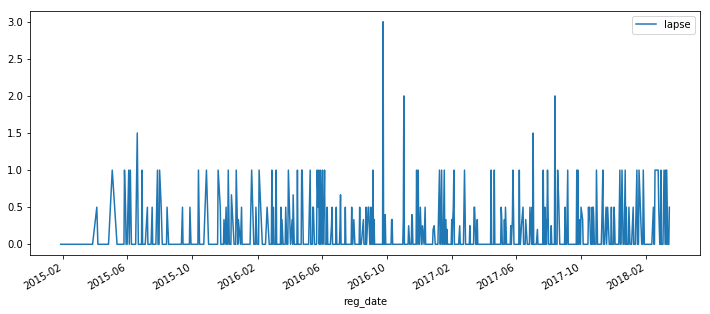

In [227]:
# Plot the results
user_purchases.plot(x='reg_date', y='lapse')

plt.show()

This plot gives us a first overview that in average most consumers buy only once during the first week. We can further explore the peak dates, probably related to seasonal sales. Values were averaged with nul values for those customers who did not purchase the first week, resulting in values below one. 